In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
results_ls = pd.read_csv('logs/results4_link_state.csv')
results_sq = pd.read_csv('logs/results4_sq.csv')
results_pq = pd.read_csv('logs/results4_pq.csv')
results_dqn = pd.read_csv('logs/results4_dqn.csv')

In [6]:
results_ls.head()

,Unnamed: 0,time,count,avg,min,max
0,0,0.0,10.0,35.80,21.0,55.0
1,1,500.0,25.0,44.16,21.0,70.0
2,2,1000.0,25.0,41.64,21.0,70.0
3,3,1500.0,25.0,42.32,21.0,70.0
4,4,2000.0,25.0,44.80,21.0,85.0


In [7]:
results_dqn.head()

,Unnamed: 0,time,count,avg,min,max
0,0,0.0,10.0,37.40,21.0,62.0
1,1,500.0,25.0,44.16,21.0,70.0
2,2,1000.0,25.0,41.68,21.0,70.0
3,3,1500.0,25.0,42.36,21.0,70.0
4,4,2000.0,25.0,44.84,21.0,85.0


In [31]:
def read_multi_run(file, n):
    df = pd.read_csv(file.format(1))
    df = df[['time', 'avg']]
    avg_cols = ['avg']
    for i in range(2, n+1):
        df2 = pd.read_csv(file.format(i))
        acol = 'avg'+str(i)
        df[acol] = df2['avg']
        avg_cols.append(acol)
    df['avg_total'] = df.apply(lambda row: np.mean([row[acol] for acol in avg_cols]), axis=1)
    df['avg_max'] = df.apply(lambda row: np.amax([row[acol] for acol in avg_cols]), axis=1)
    df['avg_min'] = df.apply(lambda row: np.amin([row[acol] for acol in avg_cols]), axis=1)
    return df.drop(avg_cols, axis=1)
    

In [32]:
df = read_multi_run('logs/results6/link_state.{}.csv', 3)

In [33]:
df.head()

,time,avg_total,avg_max,avg_min
0,0.0,41.176190,48.000000,36.428571
1,500.0,46.096677,50.576923,43.019231
2,1000.0,46.614705,48.122449,45.541667
3,1500.0,51.994184,53.627451,50.600000
4,2000.0,51.110878,53.058824,49.416667


In [75]:
fsize = 16

def plot_graph(title, *ress):
    min_avg = 10000000
    max_avg = 0
    plt.figure(figsize=(13, 7))
    for (label, res) in ress:
        min_avg = min(min_avg, np.amin(res['avg']))
        max_avg = max(max_avg, np.amax(res['avg']))
        res.drop_duplicates('time', keep='last', inplace=True)
        plt.plot(res['time'], res['avg'] ,label=label, alpha=0.5)
    plt.xlabel('Время симулятора', fontsize=fsize)
    plt.ylabel('Среднее время пакета в пути', fontsize=fsize)
    plt.legend(prop={'size':20})
    plt.ylim((min_avg - 15, max_avg + 15))
    #plt.ylim(0, 500)
    #plt.xlim((0, 50000))
    plt.title(title, fontsize=fsize)
    plt.show()
    
def plot_multi_graph(title, *ress):
    min_avg = 10000000
    max_avg = 0
    plt.figure(figsize=(13, 7))
    for (label, res) in ress:
        min_avg = min(min_avg, np.amin(res['avg_total']))
        max_avg = max(max_avg, np.amax(res['avg_total']))
        res.drop_duplicates('time', keep='last', inplace=True)
        minerr = res['avg_total'] - res['avg_min']
        maxerr = res['avg_max'] - res['avg_total']
        plt.errorbar(res['time'], res['avg_total'], yerr=[minerr, maxerr], label=label, alpha=0.5)
    plt.xlabel('Время симулятора', fontsize=fsize)
    plt.ylabel('Среднее время пакета в пути', fontsize=fsize)
    plt.legend(prop={'size':15})
    plt.ylim((min_avg - 5, max_avg + 5))
    plt.title(title, fontsize=fsize)
    plt.show()
    

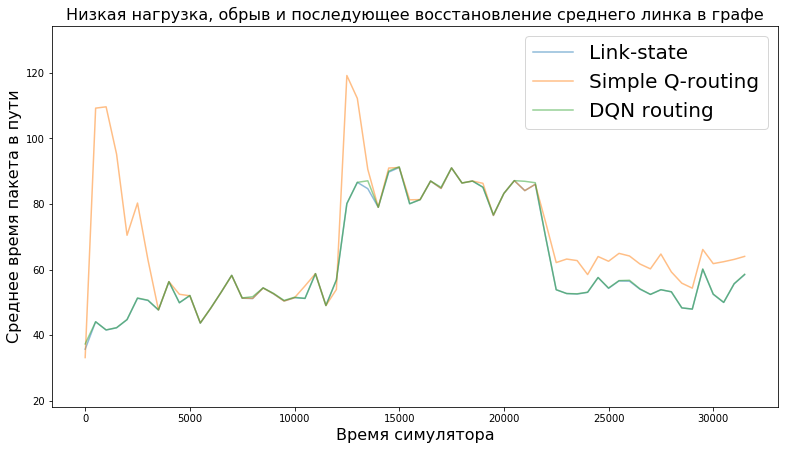

In [44]:
title = 'Низкая нагрузка, обрыв и последующее восстановление среднего линка в графе'
plot_graph(title, ('Link-state', results_ls), ('Simple Q-routing', results_sq), ('DQN routing', results_dqn))

In [46]:
results2_ls = pd.read_csv('logs/results6_link_state.csv')
results2_sq = pd.read_csv('logs/results6_sq.csv')
#results2_pq = pd.read_csv('logs/results6_pq.csv')
results2_dqn = pd.read_csv('logs/results6_dqn.csv')
results2_dqn_out_links = pd.read_csv('logs/results6_dqn_out_links.csv')
#results2_dqn_adviced = pd.read_csv('logs/results6_dqn_advice_2.csv')
results2_dqn_load_states = pd.read_csv('logs/results6_dqn_load_states.csv')

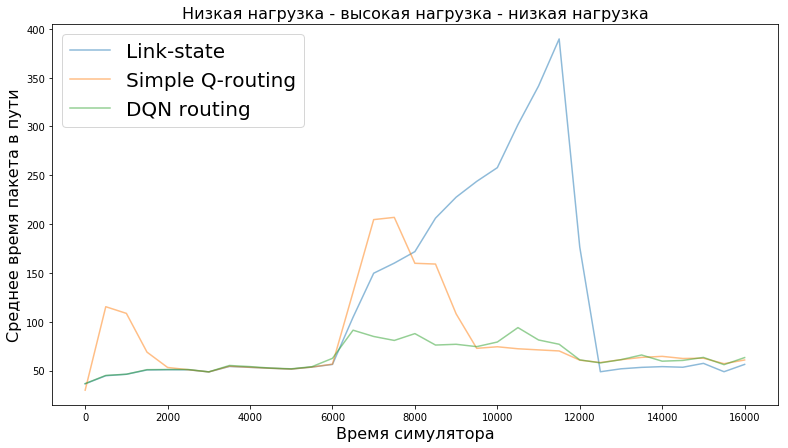

In [48]:
title = 'Низкая нагрузка - высокая нагрузка - низкая нагрузка'
plot_graph(title, ('Link-state', results2_ls), ('Simple Q-routing', results2_sq),
           ('DQN routing', results2_dqn))#, ('DQN + advice', results2_dqn_adviced))

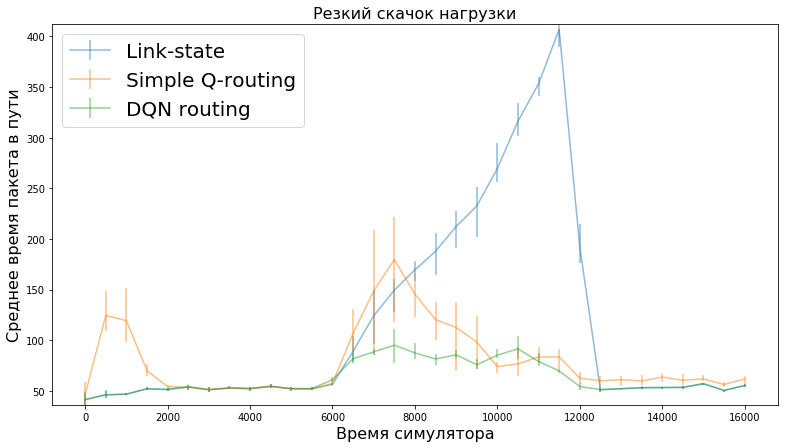

In [71]:
results6_multi_ls = read_multi_run('logs/results6/link_state.{}.csv', 3)
results6_multi_sq = read_multi_run('logs/results6/simple_q.{}.csv', 3)
results6_multi_dqn = read_multi_run('logs/results6/dqn.{}.csv', 3)
plot_multi_graph('Резкий скачок нагрузки', ('Link-state', results6_multi_ls), ('Simple Q-routing', results6_multi_sq),
                 ('DQN routing', results6_multi_dqn))

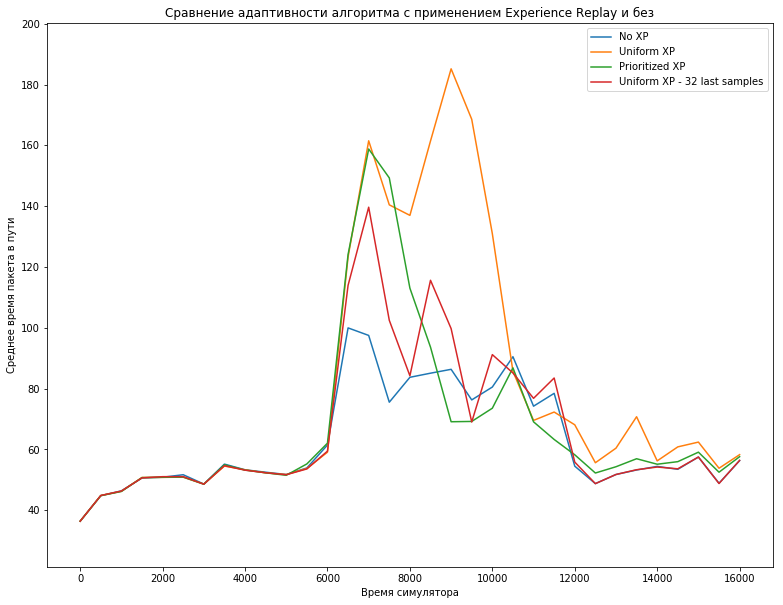

In [70]:
results2_dqn_2 = pd.read_csv('logs/results6_dqn_uniform_xp.csv')
results2_dqn_3 = pd.read_csv('logs/results6_dqn_prioritized_xp.csv')
results2_dqn_4 = pd.read_csv('logs/results6_dqn_uniform_xp_last32.csv')
title = 'Сравнение адаптивности алгоритма с применением Experience Replay и без'
plot_graph(title, ('No XP', results2_dqn), ('Uniform XP', results2_dqn_2), ('Prioritized XP', results2_dqn_3),
           ('Uniform XP - 32 last samples', results2_dqn_4))

In [73]:
results6_xp_multi_dqn = read_multi_run('logs/results6_xp_tests/dqn.{}.csv', 3)
results6_xp_multi_dqn_uniform_xp = read_multi_run('logs/results6_xp_tests/dqn_uniform_xp.{}.csv', 3)
results6_xp_multi_dqn_prioritized_xp = read_multi_run('logs/results6_xp_tests/dqn_prioritized_xp.{}.csv', 3)
results6_xp_multi_dqn_last32_xp = read_multi_run('logs/results6_xp_tests/dqn_last32_xp.{}.csv', 3)

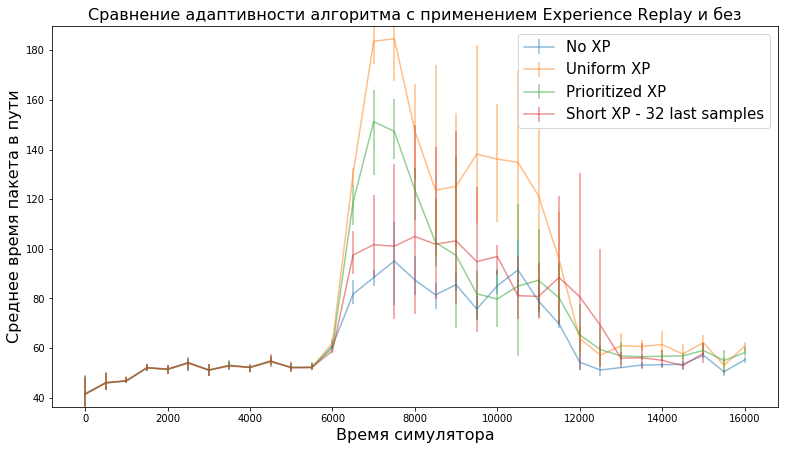

In [76]:
title = 'Сравнение адаптивности алгоритма с применением Experience Replay и без'
plot_multi_graph(title, ('No XP', results6_xp_multi_dqn), ('Uniform XP', results6_xp_multi_dqn_uniform_xp),
                 ('Prioritized XP', results6_xp_multi_dqn_prioritized_xp),
                 ('Short XP - 32 last samples', results6_xp_multi_dqn_last32_xp))

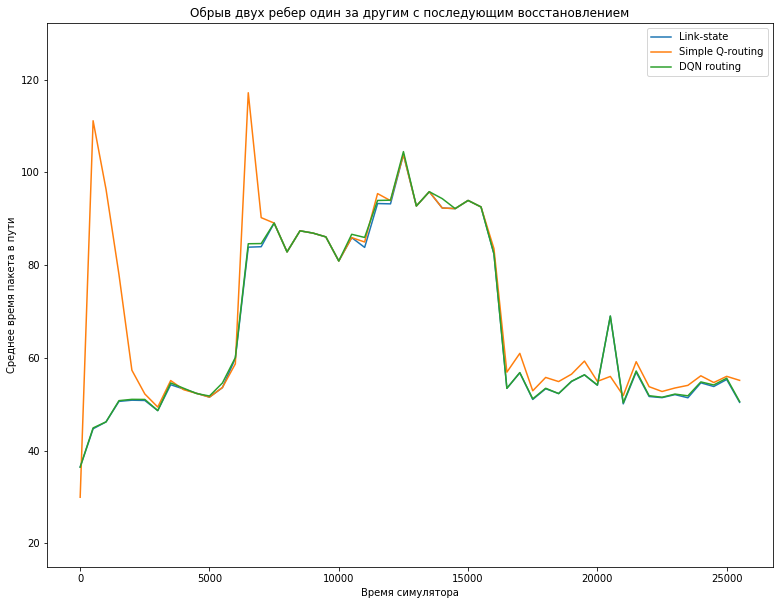

In [52]:
# results3_ls = pd.read_csv('logs/results7_ls.csv')
results3_sq = pd.read_csv('logs/results7_sq.csv')
results3_dqn = pd.read_csv('logs/results7_dqn.csv')
title = 'Обрыв двух ребер один за другим с последующим восстановлением'
plot_graph(title, ('Link-state', results3_ls), ('Simple Q-routing', results3_sq), ('DQN routing', results3_dqn))

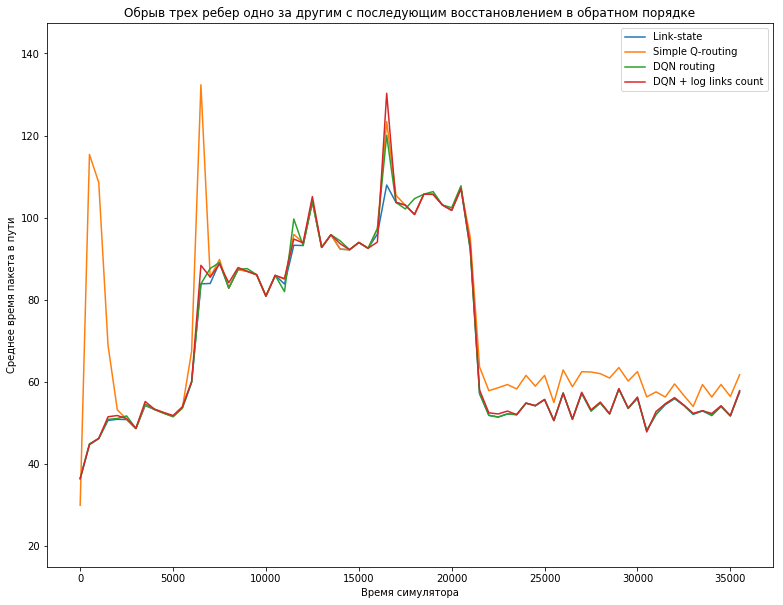

In [78]:
results4_ls = pd.read_csv('logs/results8_ls.csv')
results4_sq = pd.read_csv('logs/results8_sq.csv')
results4_dqn = pd.read_csv('logs/results8_dqn.csv')
resutls4_dqn_out_links = pd.read_csv('logs/results8_dqn_out_links.csv')
title = 'Обрыв трех ребер одно за другим с последующим восстановлением в обратном порядке'
plot_graph(title, ('Link-state', results4_ls), ('Simple Q-routing', results4_sq),
            ('DQN routing', results4_dqn), ('DQN + log links count', resutls4_dqn_out_links))

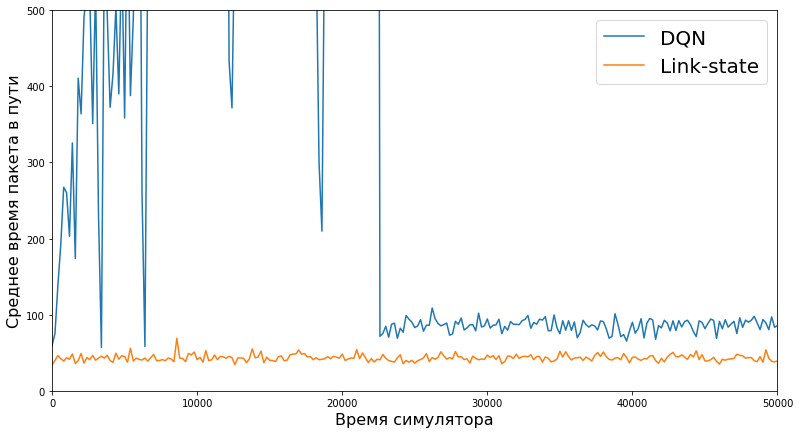

In [56]:
results_no_pretrain = pd.read_csv('logs/results5_no_pretrain_dqn.csv')
results5_ls = pd.read_csv('logs/results5_link_state.csv')
plot_graph('Без предобучения', ('DQN', results_no_pretrain), ('Link-state', results5_ls))

In [67]:
results6_ls = pd.read_csv('logs/results10_ls.csv')
results6_sq = pd.read_csv('logs/results10_sq.csv')
#results2_pq = pd.read_csv('logs/results6_pq.csv')
results6_dqn = pd.read_csv('logs/results10_dqn.csv')
results6_dqn_out_links = pd.read_csv('logs/results10_dqn_out_links.csv')
results6_dqn_adviced = pd.read_csv('logs/results10_dqn_advice_2.csv')

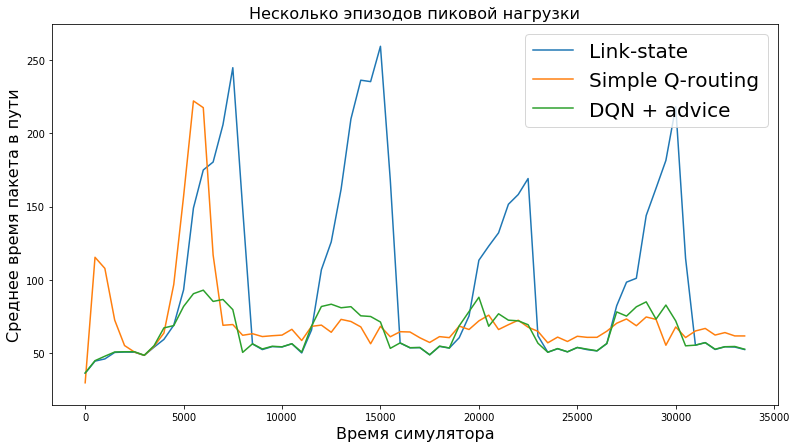

In [68]:
title = 'Несколько эпизодов пиковой нагрузки'
plot_graph(title, ('Link-state', results6_ls), ('Simple Q-routing', results6_sq),
          ('DQN + advice', results6_dqn_adviced))

In [55]:
results8_multi_ls = read_multi_run('logs/results8/link_state.{}.csv', 3)
results8_multi_sq = read_multi_run('logs/results8/simple_q.{}.csv', 3)
results8_multi_dqn = read_multi_run('logs/results8/dqn.{}.csv', 3)

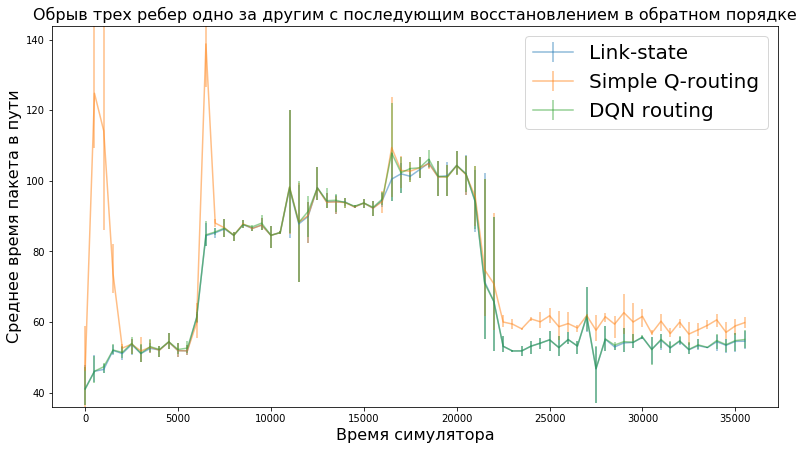

In [67]:
title = 'Обрыв трех ребер одно за другим с последующим восстановлением в обратном порядке'
plot_multi_graph(title, ('Link-state', results8_multi_ls), ('Simple Q-routing', results8_multi_sq),
          ('DQN routing', results8_multi_dqn))

In [64]:
results10_multi_ls = read_multi_run('logs/results10/link_state.{}.csv', 3)
results10_multi_sq = read_multi_run('logs/results10/simple_q.{}.csv', 3)
results10_multi_dqn = read_multi_run('logs/results10/dqn.{}.csv', 3)

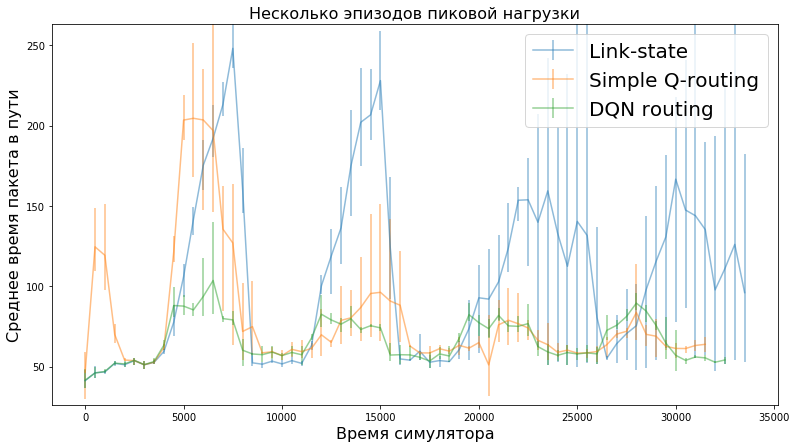

In [65]:
title = 'Несколько эпизодов пиковой нагрузки'
plot_multi_graph(title, ('Link-state', results10_multi_ls), ('Simple Q-routing', results10_multi_sq),
          ('DQN routing', results10_multi_dqn))